In [1]:
import numpy as np

from qiskit import QuantumCircuit
from qiskit.visualization import plot_histogram
from qiskit import Aer

from scipy.optimize import minimize
from scipy.optimize import basinhopping
from scipy.optimize import differential_evolution

from MSA_class import MultipleSequenceAlignment
from Qiskit_class import QiskitSimulation


import matplotlib.pyplot as plt

plt.rc("font", family=["Helvetica", "Arial"])
plt.rc("text", usetex=True)
plt.rc("xtick", top=True, direction="in")
plt.rc("ytick", right=True, direction="in")



## Testcase 1)

In [10]:

my_strings   = np.array(["A","G","C","C"])
my_penalties = np.array([1,1,1])
my_msa       = MultipleSequenceAlignment(strings = my_strings, penalties = my_penalties, normalize_weights=True) 

valid_solution = np.array([1,1,1,1])
solutions = [valid_solution]


print("Initial matrix:\n",my_msa.initial_MSA)

print("Valid solutions:")
for solution in solutions:
    print(my_msa.bit_state_2_matrix(solution))


Initial matrix:
 [['A']
 ['C']
 ['C']
 ['G']]
Valid solutions:
[['A']
 ['C']
 ['C']
 ['G']]


In [11]:
p = 2
theta_0 = np.ones(p)

my_simulation = QiskitSimulation(initial_MSA=my_msa, theta_0=theta_0, backend_name="qasm_simulator", shots=100000)

In [12]:
#options = {"disp":False,"maxiter": 200}
#res = minimize(fun = my_simulation.execute_circuit, x0 = theta_0, method='COBYLA',options = options)


bounds = [(0,2*np.pi), (0,2*np.pi)]
res = differential_evolution(func=my_simulation.execute_circuit, bounds=bounds,popsize=10)

print("Total number of different states found in simulation:",len(list(my_simulation.current_counts.values())))
res

Total number of different states found in simulation: 1


     fun: 0.0
 message: 'Optimization terminated successfully.'
    nfev: 523
     nit: 25
 success: True
       x: array([5.49828529, 3.14148164])

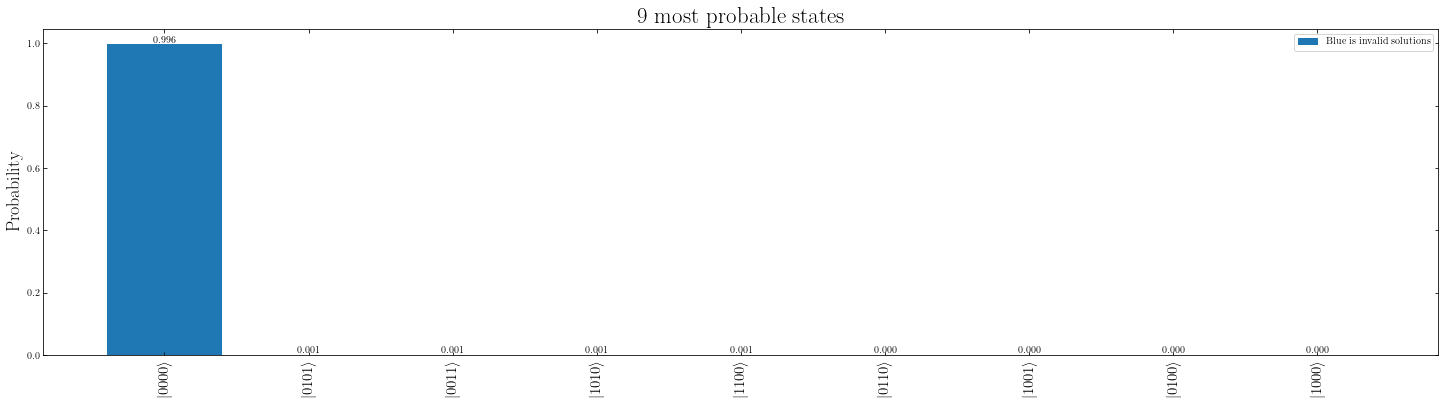

In [9]:
my_simulation.plot_count_histogram(counts = my_simulation.current_counts, solutions = solutions)

In [6]:
idx = 0
my_simulation.print_solution(idx)

#####################################################
#### Most probale state according to simulation ####
-----------------------|0000|-----------------------
####################################################
with corresponding MSA:
 --- Invalid state --- 
(Returning 2D zero array)
[[0]
 [0]
 [0]
 [0]]
####################################################


## Testcase 2)

In [7]:
## Setting 1: penalties = 100,100,100 ; backend_name="qasm_simulator" ; shots=100000; p = 6; theta_0 = np.ones(p); method='COBYLA'

my_strings   = np.array(["AG","G"])
my_penalties = np.array([1,1,1])*2
my_msa       = MultipleSequenceAlignment(strings = my_strings, penalties = my_penalties) 

solutions = [my_msa.initial_bitstring,np.array([1,0,0,1,0,1],dtype=np.float64)]


print("Initial matrix:\n",my_msa.initial_MSA)

print("Valid solutions:")
for solution in solutions:
    print(my_msa.bit_state_2_matrix(solution))


Initial matrix:
 [['A' 'G']
 ['G' '_']]
Valid solutions:
[['A' 'G']
 ['G' '_']]
[['A' 'G']
 ['_' 'G']]


In [8]:
p = 200
theta_0 = np.ones(p)

my_simulation = QiskitSimulation(initial_MSA=my_msa, theta_0=theta_0, backend_name="qasm_simulator", shots=10000)


In [9]:
#options = {"disp":False,"maxiter": 200}
#res = minimize(fun = my_simulation.execute_circuit, x0 = theta_0, method='COBYLA',options = options)
#res = basinhopping(func = my_simulation.execute_circuit, x0 = theta_0,T=1)

bounds = [(0,2 * np.pi), (0,2 * np.pi)]
res = differential_evolution(func=my_simulation.execute_circuit, bounds=bounds,popsize=10)
print("Total number of different states found in simulation:",len(list(my_simulation.current_counts.values())))
res

Total number of different states found in simulation: 63


     fun: 2.1916
 message: 'Optimization terminated successfully.'
    nfev: 463
     nit: 22
 success: True
       x: array([5.89280922, 0.3872103 ])

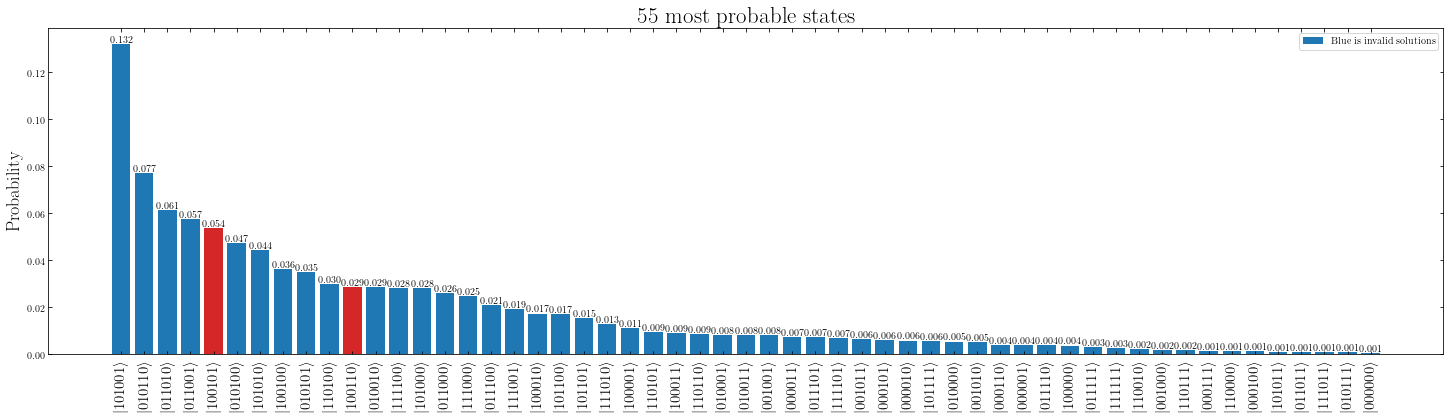

In [10]:
my_simulation.plot_count_histogram(counts = my_simulation.current_counts, solutions = solutions)

In [11]:
idx = 0
my_simulation.print_solution(idx)

#####################################################
#### Most probale state according to simulation ####
----------------------|101001|----------------------
####################################################
with corresponding MSA:
[['G' '_']
 ['_' 'G']]
####################################################


## Testcase 3)

In [12]:
my_strings   = np.array(["AGG","G"])
my_penalties = np.array([1,1,1])*2
my_msa       = MultipleSequenceAlignment(strings = my_strings, penalties = my_penalties) 

print("Initial matrix:\n",my_msa.initial_MSA)

valid_sol = np.array([1,0,0,0,1,0,0,0,1,1,0,0])
good_sol1 = np.array([1,0,0,0,1,0,0,0,1,0,1,0])
good_sol2 = np.array([1,0,0,0,1,0,0,0,1,0,0,1])
solutions = [valid_sol,good_sol1,good_sol2]

print("Valid solutions:")
for solution in solutions:
    print(my_msa.bit_state_2_matrix(solution))


Initial matrix:
 [['A' 'G' 'G']
 ['G' '_' '_']]
Valid solutions:
[['A' 'G' 'G']
 ['G' '_' '_']]
[['A' 'G' 'G']
 ['_' 'G' '_']]
[['A' 'G' 'G']
 ['_' '_' 'G']]


In [13]:
p = 2
theta_0 = np.ones(p)

my_simulation = QiskitSimulation(initial_MSA=my_msa, theta_0=theta_0, backend_name="qasm_simulator", shots=100000)

#options = {"disp":False,"maxiter": 200}
#res = minimize(fun = my_simulation.execute_circuit, x0 = theta_0, method='COBYLA',options = options)

bounds = [(0,2 * np.pi), (0,2 * np.pi)]
res = differential_evolution(func=my_simulation.execute_circuit, bounds=bounds,popsize=10)

print("Total number of different states found in simulation:",len(list(my_simulation.current_counts.values())))
res

Total number of different states found in simulation: 3764


     fun: 3.852505
     jac: array([0., 0.])
 message: 'Optimization terminated successfully.'
    nfev: 611
     nit: 27
 success: True
       x: array([4.95728066, 6.14013595])

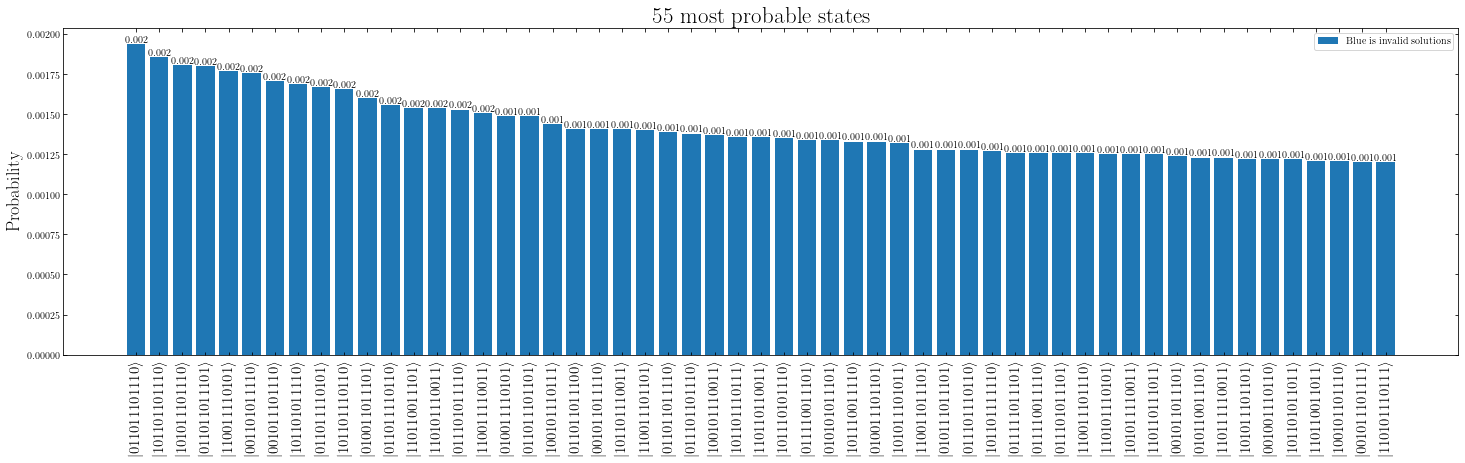

In [14]:
my_simulation.plot_count_histogram(counts = my_simulation.current_counts, solutions = solutions)

In [15]:
idx = 0
my_simulation.print_solution(idx)

#####################################################
#### Most probale state according to simulation ####
-------------------|011011101110|-------------------
####################################################
with corresponding MSA:
 --- Invalid state --- 
(Returning 2D zero array)
[[0 0 0]
 [0 0 0]]
####################################################


In [16]:
type(False)

bool